# Smoke Detection

## About Dataset:

This dataset consists of 60,000 readings of temperature, humidity, pressure, particulate matter, concentrations of compounds such as Hydrogen (H2), Ethanol and Carbon Dioxide (CO2), etc. taken using a set of different types of sensors from various indoor and outdoor locations as described in [this hackster.io post about a real-time smoke detection system.](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6) Data collection from several different locations along with the use of various different sensors provide us with a diverse set of features and data points to predict the presence or absence of smoke.

## Objective:

The objective of this project is to build a model that can accurately detect the presence or absence of smoke.

## Cleaning the Data:

### Importing Common Data Handling and Processing Libraries:

In [1]:
import numpy as np
import pandas as pd

### Importing the Data:

In [2]:
smoke = pd.read_csv(r"C:\Vishnu Vardhan\CS\Data Science\Imarticus Data Analytics & ML\Projects\Smoke Detection\smoke_detection_iot.csv")
smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


### Data Overview:
An overview of the datatypes along with the count of non-null values of each feature. 

In [3]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


### Dropping the Unnecessary Columns:
The 'Unnamed: 0' column consists of serial numbers which is not required for data analysis and the 'UTC' column consists to timestamps in the UTC format which is not required either as we will not be considering this data as a time series.

In [4]:
smoke.drop(['Unnamed: 0', 'UTC'], axis = 1, inplace = True)

### Missing Value Check:

In [5]:
Total = smoke.isnull().sum().sort_values(ascending = False)          
Percent = (smoke.isnull().sum()*100/smoke.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Temperature[C],0,0.0
Humidity[%],0,0.0
TVOC[ppb],0,0.0
eCO2[ppm],0,0.0
Raw H2,0,0.0
Raw Ethanol,0,0.0
Pressure[hPa],0,0.0
PM1.0,0,0.0
PM2.5,0,0.0
NC0.5,0,0.0


## Exploratory Data Analysis:

### Statistical Summary of the Data:

In [6]:
smoke.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature[C],62630.0,15.970424,14.359576,-22.010,10.99425,20.130,25.4095,59.930
Humidity[%],62630.0,48.539499,8.865367,10.740,47.53000,50.150,53.2400,75.200
TVOC[ppb],62630.0,1942.057528,7811.589055,0.000,130.00000,981.000,1189.0000,60000.000
eCO2[ppm],62630.0,670.021044,1905.885439,400.000,400.00000,400.000,438.0000,60000.000
Raw H2,62630.0,12942.453936,272.464305,10668.000,12830.00000,12924.000,13109.0000,13803.000
Raw Ethanol,62630.0,19754.257912,609.513156,15317.000,19435.00000,19501.000,20078.0000,21410.000
Pressure[hPa],62630.0,938.627649,1.331344,930.852,938.70000,938.816,939.4180,939.861
PM1.0,62630.0,100.594309,922.524245,0.000,1.28000,1.810,2.0900,14333.690
PM2.5,62630.0,184.467770,1976.305615,0.000,1.34000,1.880,2.1800,45432.260
NC0.5,62630.0,491.463608,4265.661251,0.000,8.82000,12.450,14.4200,61482.030


### Importing Data Visualisation Libraries:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plotting Correlations between Independent Features and the Target Variable:

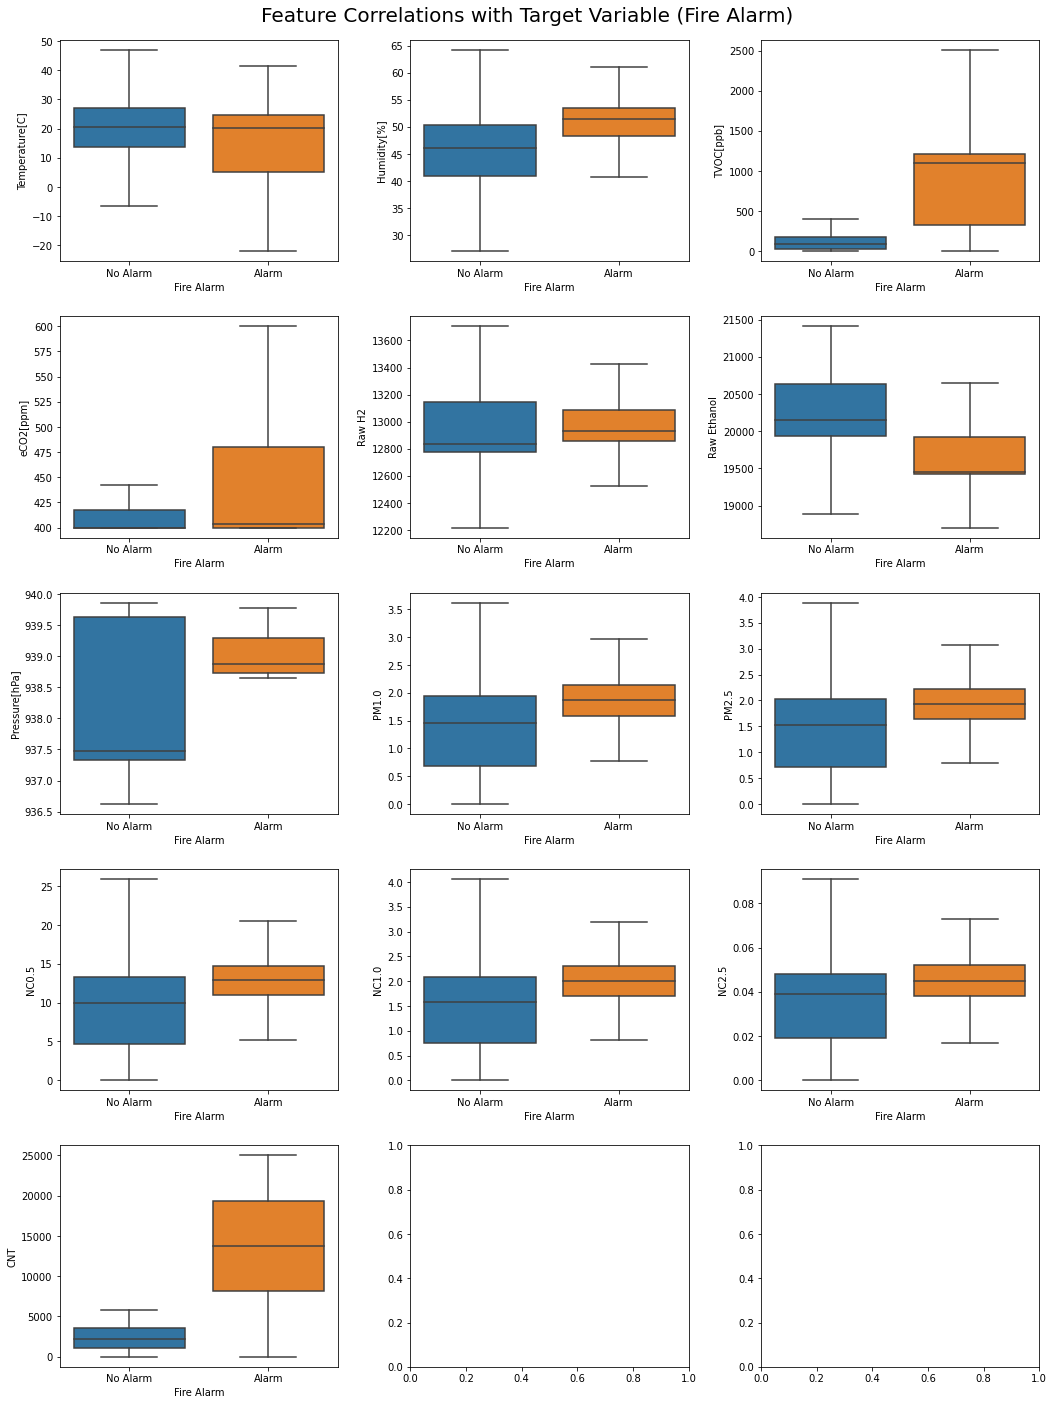

In [8]:
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 20))

for feature, subplot in zip(smoke, ax.flatten()):
    if feature == 'Fire Alarm':
        continue
    sns.boxplot(x = smoke['Fire Alarm'], y = smoke[feature], showfliers = False, ax = subplot)
    subplot.set_xticks([0, 1], ['No Alarm', 'Alarm'])

plt.suptitle('Feature Correlations with Target Variable (Fire Alarm)', fontsize = 20)
plt.tight_layout(pad = 2)
plt.show()

### Printing the Correlation Matrix:

In [9]:
corr = smoke.corr()
corr

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.094741,-0.128118


### Plotting a Heatmap of the Correlations:
The correlation heatmap allows us to visualise any multicollinearities in the data.

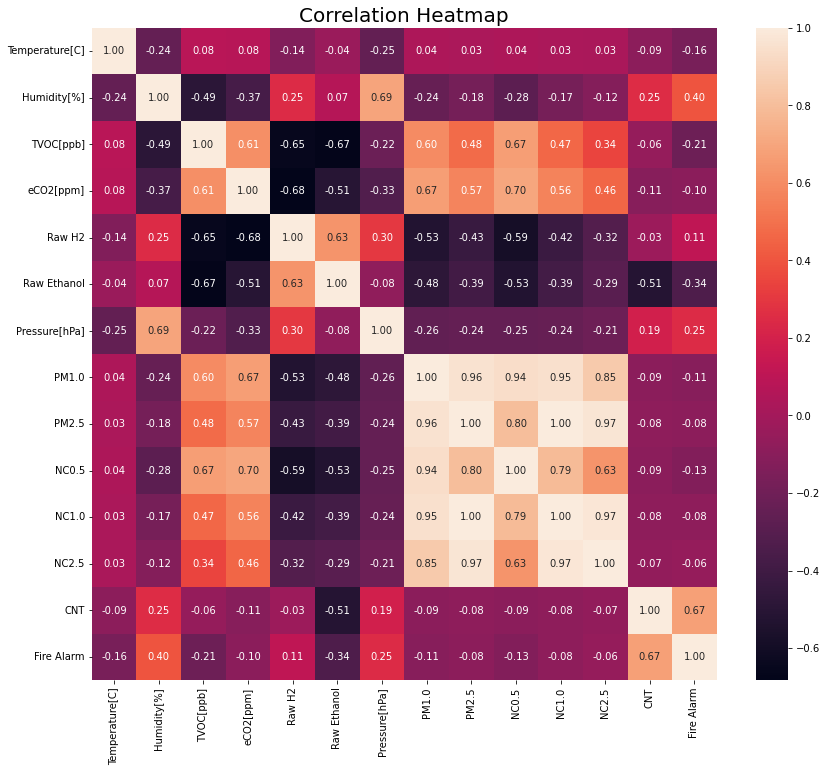

In [10]:
plt.figure(figsize = (14, 12))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

**Despite presence of some strong multicollinearities in the data, we will first attempt a naive approach of building the classification models without removing the multicollinearities. If the naive approach does not yield satisfactory results, we will remove the multicollinearities and re-try.**

## Data Pre-processing:

### Splitting the Dependent and the Independent Variables:

In [11]:
y = smoke['Fire Alarm']
x = smoke.drop('Fire Alarm', axis = 1)

### Splitting the Data into Training and Testing Sets:

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50104, 13), (12526, 13), (50104,), (12526,))

### Scaling the Data:

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Checking if the Target Classes are Balanced:

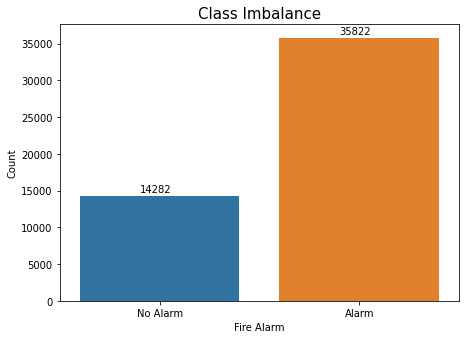

In [14]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

**It is clear that the target classes are imbalanced. This needs to be addressed before building any model.**

### Over-Sampling the Minority Class using SMOTE (Synthetic Minority Over-sampling Technique):

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10) 
X_train, y_train = smote.fit_resample(X_train, y_train)

### Re-checking if the Target Classes are Balanced:

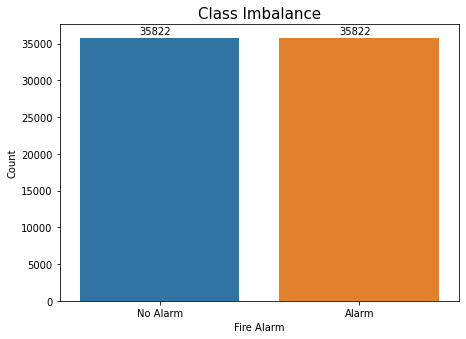

In [16]:
sns.countplot(x = y_train)
plt.text(x = 0 - 0.1, y = y_train.value_counts()[0] + 500, s = y_train.value_counts()[0])
plt.text(x = 1 - 0.1, y = y_train.value_counts()[1] + 500, s = y_train.value_counts()[1])
plt.xticks([0, 1], ['No Alarm', 'Alarm'])
plt.ylabel('Count')
plt.tight_layout(pad = -1)
plt.title('Class Imbalance', fontsize = 15)
plt.show()

**The target classes are now balanced in the training set, making it feasible for model building.**

## Building the Models:

### Defining Model Evaluation Metrics & Functions:

In [17]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# The confusion matrix allows us to identify the number of correct 
# and incorrect predictions for each target class.
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm, 
                               columns = ['Predicted: No Alarm', 'Predicted: Alarm'], 
                               index = ['Actual: No Alarm', 'Actual: Alarm'])
    sns.heatmap(conf_matrix, annot = True, cbar = False, fmt = 'd', linewidth = 0.5, annot_kws = {'size': 25})
    plt.xticks()
    plt.yticks()
    plt.title(model_name + " Confusion Matrix", fontsize = 20)
    plt.show()

# The ROC curve (receiver operating characteristic curve) is a graph showing the performance of 
# a classification model by plotting True Positive Rate (TPR) vs. False Positive Rate (FPR) 
# at different classification thresholds. The Area Under Curve (AUC) is simply the area under 
# the ROC curve and it is representative of how well the model can distinguish between the target classes.
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0,1], [0,1], 'r--')
    plt.title('ROC Curve for ' + model_name + ' Classifier', fontsize = 15)
    plt.xlabel('False Positive Rate (1- Specificity)', fontsize = 12)
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 12)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred), 4)))
    plt.grid(True)

# Defining a dataframe for tallying the evaluation metrics of all models.
# This will serve as our score card.
score_card = pd.DataFrame(columns = ['Model', 'Precision Score', 'Recall Score', 'f1-Score', 'AUC Score', 'Accuracy Score'])

# Defining an iterable to set the appropriate index upon insertion of a new model's metrics:
index_iter = iter(range(1, 10))

# update_score_card updates the score card model name, the target classes 
# and the corresponding model predictions.
def update_score_card(y_test, y_pred, model_name):
    global score_card
    new_score = pd.DataFrame({'Model': model_name, 
                              'Precision Score': metrics.precision_score(y_test, y_pred), 
                              'Recall Score': metrics.recall_score(y_test, y_pred), 
                              'f1-Score': metrics.f1_score(y_test, y_pred), 
                              'AUC Score': roc_auc_score(y_test, y_pred), 
                              'Accuracy Score':metrics.accuracy_score(y_test, y_pred)}, 
                             index = [next(index_iter)])
    score_card = pd.concat([score_card, new_score])
    return score_card

### Logistic Regression:

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred_logreg = logreg.predict(X_test)

#### Logistic Regression Model Evaluations:

In [20]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3591
           1       1.00      0.98      0.99      8935

    accuracy                           0.99     12526
   macro avg       0.98      0.99      0.98     12526
weighted avg       0.99      0.99      0.99     12526



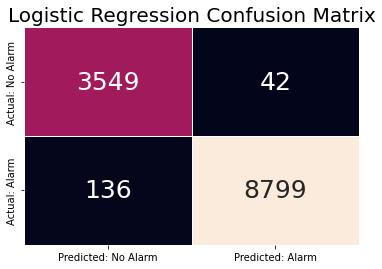

In [21]:
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression')

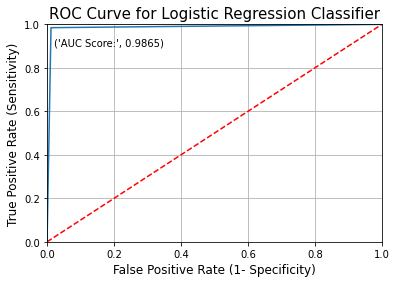

In [22]:
plot_roc(y_test, y_pred_logreg, 'Logistic Regression')

In [23]:
update_score_card(y_test, y_pred_logreg, 'Logistic Regression')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,Logistic Regression,0.995249,0.984779,0.989986,0.986542,0.98579


### K-Nearest Neighbours (KNN):

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(X_train, y_train)

In [25]:
y_pred_knn = knn.predict(X_test)

#### K-Nearest Neighbours Model Evaluations:

In [26]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3591
           1       1.00      1.00      1.00      8935

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



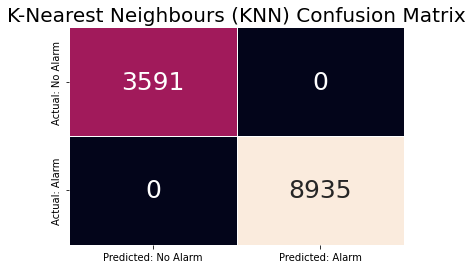

In [27]:
plot_confusion_matrix(y_test, y_pred_knn, 'K-Nearest Neighbours (KNN)')

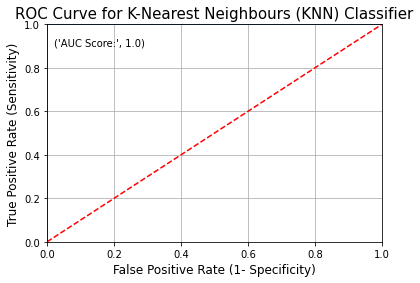

In [28]:
plot_roc(y_test, y_pred_knn, 'K-Nearest Neighbours (KNN)')

In [29]:
update_score_card(y_test, y_pred_knn, 'K-Nearest Neighbours (KNN)')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,Logistic Regression,0.995249,0.984779,0.989986,0.986542,0.98579
2,K-Nearest Neighbours (KNN),1.0,1.0,1.0,1.0,1.0


### Support Vector Classifier (SVC):

In [30]:
# Defining the hyperparameter grid space:
search_parameters = { 
    'gamma' : ['scale', 'auto'],
    'C': [12, 13, 14]
}

In [31]:
# Hyperparameter search:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc_init = SVC(kernel = 'rbf')
svc_grid = GridSearchCV(estimator = svc_init, param_grid = search_parameters, scoring = 'accuracy', cv = 5)
svc_grid.fit(X_train, y_train)
svc_grid.best_params_

{'C': 13, 'gamma': 'auto'}

In [32]:
svc = SVC(kernel = 'rbf', gamma = svc_grid.best_params_['gamma'], C = svc_grid.best_params_['C'])
svc.fit(X_train, y_train)

SVC(C=13, gamma='auto')

In [33]:
y_pred_svc = svc.predict(X_test)

#### Support Vector Classifier (SVC) Model Evaluations:

In [34]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3591
           1       1.00      1.00      1.00      8935

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



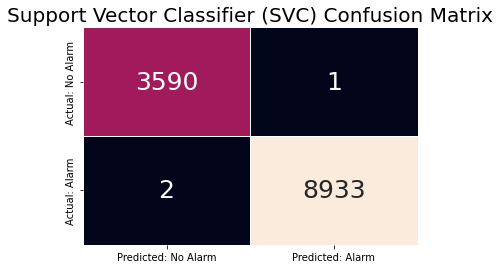

In [35]:
plot_confusion_matrix(y_test, y_pred_svc, 'Support Vector Classifier (SVC)')

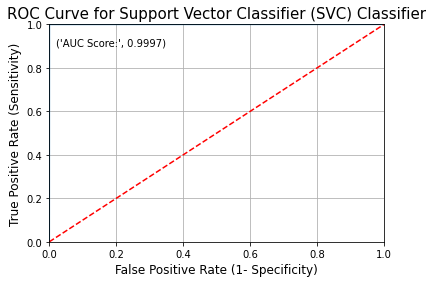

In [36]:
plot_roc(y_test, y_pred_svc, 'Support Vector Classifier (SVC)')

In [37]:
update_score_card(y_test, y_pred_svc, 'Support Vector Classifier (SVC)')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,Logistic Regression,0.995249,0.984779,0.989986,0.986542,0.98579
2,K-Nearest Neighbours (KNN),1.0,1.0,1.0,1.0,1.0
3,Support Vector Classifier (SVC),0.999888,0.999776,0.999832,0.999749,0.99976


### Gaussian Naive-Bayes:

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred_gnb = gnb.predict(X_test)

#### Gaussian Naive-Bayes Model Evaluations:

In [40]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.86      0.40      0.55      3591
           1       0.80      0.97      0.88      8935

    accuracy                           0.81     12526
   macro avg       0.83      0.69      0.71     12526
weighted avg       0.82      0.81      0.78     12526



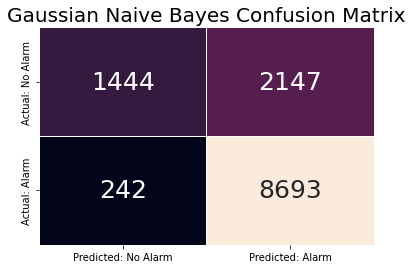

In [41]:
plot_confusion_matrix(y_test, y_pred_gnb, 'Gaussian Naive Bayes')

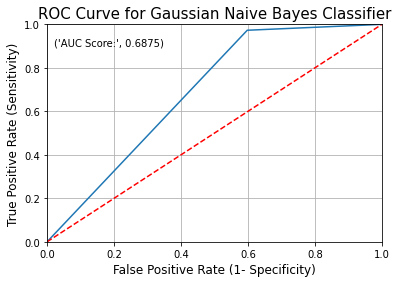

In [42]:
plot_roc(y_test, y_pred_gnb, 'Gaussian Naive Bayes')

In [43]:
update_score_card(y_test, y_pred_gnb, 'Gaussian Naive Bayes')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,Logistic Regression,0.995249,0.984779,0.989986,0.986542,0.98579
2,K-Nearest Neighbours (KNN),1.0,1.0,1.0,1.0,1.0
3,Support Vector Classifier (SVC),0.999888,0.999776,0.999832,0.999749,0.99976
4,Gaussian Naive Bayes,0.801937,0.972916,0.879191,0.687516,0.809277


### eXtreme Gradient Boosting (XGBoost):

In [44]:
# Defining the hyperparameter grid space:
search_parameters_xgb = [{'max_depth': [2, 3, 4]}]

In [45]:
# Hyperparameter search:

from xgboost.sklearn import XGBClassifier

xgbm_init = XGBClassifier(objective = 'binary:hinge', 
                          n_estimators = 100, 
                          num_parallel_tree = 10, 
                          random_state = 10)

grid = GridSearchCV(estimator = xgbm_init, 
                    param_grid = search_parameters_xgb, 
                    scoring = 'accuracy', 
                    cv = 5, 
                    n_jobs = -1)

xgbm_grid = grid.fit(X_train, y_train)

print('Best parameters for eXtreme Gradient Boosting classifier: ', xgbm_grid.best_params_, '\n')

Best parameters for eXtreme Gradient Boosting classifier:  {'max_depth': 3} 



In [46]:
xgbm = XGBClassifier(objective = 'binary:hinge', 
                     n_estimators = 100, 
                     num_parallel_tree = 10, 
                     max_depth = xgbm_grid.best_params_['max_depth'], 
                     random_state = 10)

In [47]:
y_pred_xgbm  = xgbm.fit(X_train, y_train).predict(X_test)

#### XGBoost Model Evaluations:

In [48]:
print(classification_report(y_test, y_pred_xgbm))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3591
           1       1.00      1.00      1.00      8935

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



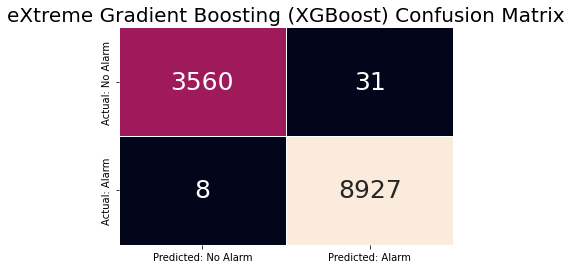

In [49]:
plot_confusion_matrix(y_test, y_pred_xgbm, 'eXtreme Gradient Boosting (XGBoost)')

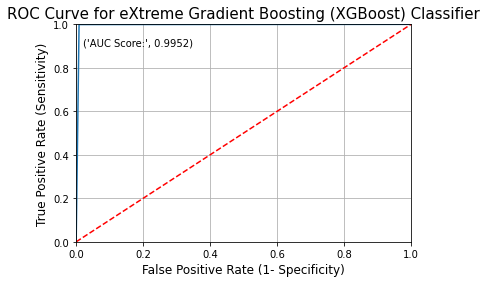

In [50]:
plot_roc(y_test, y_pred_xgbm, 'eXtreme Gradient Boosting (XGBoost)')

In [51]:
update_score_card(y_test, y_pred_xgbm, 'eXtreme Gradient Boosting (XGBoost)')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,Logistic Regression,0.995249,0.984779,0.989986,0.986542,0.98579
2,K-Nearest Neighbours (KNN),1.0,1.0,1.0,1.0,1.0
3,Support Vector Classifier (SVC),0.999888,0.999776,0.999832,0.999749,0.99976
4,Gaussian Naive Bayes,0.801937,0.972916,0.879191,0.687516,0.809277
5,eXtreme Gradient Boosting (XGBoost),0.996539,0.999105,0.99782,0.995236,0.996886


### Random Forest:

In [52]:
# Defining the hyperparameter grid space:
search_parameters_rf = [{'n_estimators': [125, 150, 175], 
                         'criterion': ['gini', 'entropy'], 
                         'max_depth': [9, 10, 11]}]

In [53]:
# Hyperparameter search:

from sklearn.ensemble import RandomForestClassifier

rf_cls_CV = RandomForestClassifier(oob_score = True, random_state = 10)

grid = GridSearchCV(estimator = rf_cls_CV, param_grid = search_parameters_rf, scoring = 'accuracy', cv = 5, n_jobs = -1)

rf_grid = grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 150} 



In [54]:
rf_grid_model = RandomForestClassifier(n_estimators = rf_grid.best_params_.get('n_estimators'),
                                       criterion = rf_grid.best_params_.get('criterion'),
                                       max_depth = rf_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = None,
                                       min_samples_leaf = 1,
                                       min_samples_split = 2,
                                       oob_score = True,
                                       random_state = 10, 
                                       n_jobs = -1)

rf_grid_model = rf_grid_model.fit(X_train, y_train)

In [55]:
y_pred_rf = rf_grid_model.predict(X_test)

#### Random Forest Model Evaluations:

In [56]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3591
           1       1.00      0.98      0.99      8935

    accuracy                           0.98     12526
   macro avg       0.97      0.99      0.98     12526
weighted avg       0.98      0.98      0.98     12526



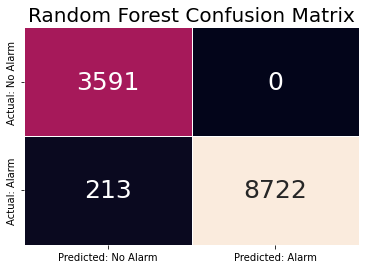

In [57]:
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

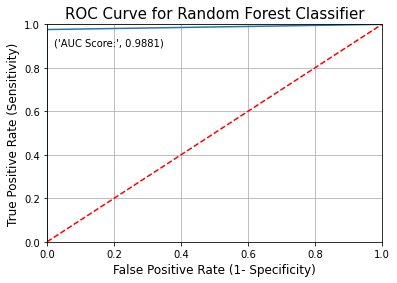

In [58]:
plot_roc(y_test, y_pred_rf, 'Random Forest')

In [59]:
update_score_card(y_test, y_pred_rf, 'Random Forest')

,Model,Precision Score,Recall Score,f1-Score,AUC Score,Accuracy Score
1,Logistic Regression,0.995249,0.984779,0.989986,0.986542,0.98579
2,K-Nearest Neighbours (KNN),1.0,1.0,1.0,1.0,1.0
3,Support Vector Classifier (SVC),0.999888,0.999776,0.999832,0.999749,0.99976
4,Gaussian Naive Bayes,0.801937,0.972916,0.879191,0.687516,0.809277
5,eXtreme Gradient Boosting (XGBoost),0.996539,0.999105,0.99782,0.995236,0.996886
6,Random Forest,1.0,0.976161,0.987937,0.988081,0.982995


## Conclusion:

With minimal data pre-processing and the application of synthetic minority oversampling, most models are able to achieve a high classification accuracy. The K-Nearest Neighbours (KNN) model achieves the highest accuracy at 100%. KNN being a simple and computationally inexpensive model makes it even more viable for deployment purposes.